In [4]:
from helper_functions import unzip_data

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data('/content/10_food_classes_all_data.zip')

--2025-02-28 14:25:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 74.125.137.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  96.4MB/s    in 5.1s    

2025-02-28 14:25:42 (96.7 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [5]:
train_dir = '/content/10_food_classes_all_data/train'
test_dir = '/content/10_food_classes_all_data/test'

In [6]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [7]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

def view_random_picture(target_dir, target_class):
    target_folder = target_dir + '/' + target_class
    random_image = random.sample(os.listdir(target_folder),1)
    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.title(target_class)
    plt.axis(False)
    plt.imshow(img)

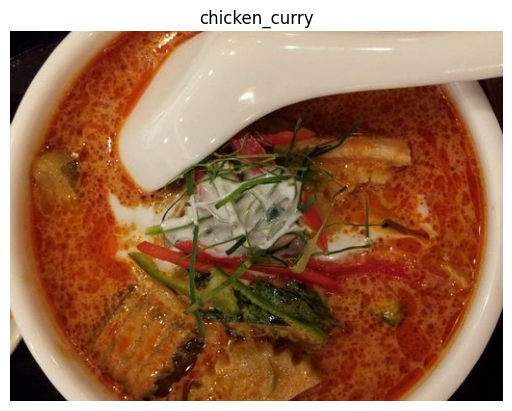

In [8]:
view_random_picture(train_dir,random.choice(class_names))

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               class_mode="categorical",
                                               seed=42)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             class_mode="categorical",
                                             seed=42)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


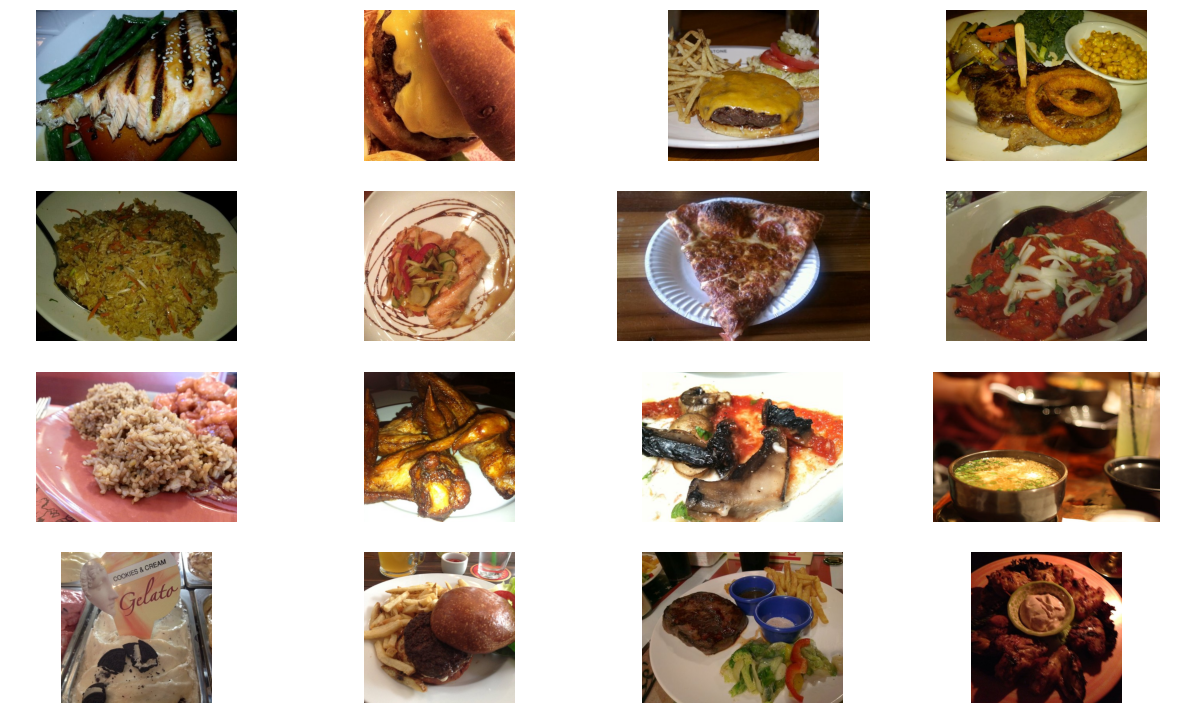

In [37]:
from PIL import Image

images = []
for folder in os.listdir(train_dir):
    for image in os.listdir(train_dir + '/' + folder):
        images.append(os.path.join(train_dir, folder, image))


plt.figure(1, figsize=(15,9))
plt.axis(False)
n = 0
for i in range(16):
    n +=1
    random_img = random.choice(images)
    img = mpimg.imread(random_img)
    plt.subplot(4, 4, n)
    plt.axis('off')
    plt.imshow(img)

plt.show()

In [73]:
image_size = (224,224)

input_layer = keras.layers.Input(shape= image_size + (3,))
base_model = keras.applications.xception.Xception(include_top=False, input_tensor=input_layer)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(len(class_names), activation='softmax')(avg)
model = keras.models.Model(inputs=input_layer, outputs=output)

In [74]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 111, 111, 32)   │            864 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 111, 111, 32)   │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 111, 111, 32)   │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 109, 109, 64)   │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 109, 109, 64)   │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 109, 109, 64)   │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 109, 109, 128)  │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 109, 109, 128)  │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 109, 109, 128)  │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 109, 109, 128)  │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 109, 109, 128)  │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 55, 55, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 55, 55, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├──────────────────────

 Total params: 20,881,970 (79.66 MB)

 Trainable params: 20,827,442 (79.45 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [75]:
for layer in base_model.layers:
    layer.trainable = False

optimizer = keras.optimizers.Adam(learning_rate=0.2)
loss = keras.losses.CategoricalCrossentropy()

model.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])


history_ = model.fit(train_data,epochs=5,
                     batch_size=32,
                     validation_data=test_data)

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 54s 198ms/step - accuracy: 0.6210 - loss: 19.0587 - val_accuracy: 0.7752 - val_loss: 9.5192
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 172ms/step - accuracy: 0.7696 - loss: 10.6642 - val_accuracy: 0.7548 - val_loss: 14.4762
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 171ms/step - accuracy: 0.7974 - loss: 9.6511 - val_accuracy: 0.7976 - val_loss: 11.5125
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 174ms/step - accuracy: 0.8242 - loss: 8.4240 - val_accuracy: 0.7860 - val_loss: 12.8609
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 176ms/step - accuracy: 0.8393 - loss: 7.5949 - val_accuracy: 0.8168 - val_loss: 11.6034


In [76]:
for layer in model.layers:
  print(layer.name,layer.trainable)

input_layer_4 False
block1_conv1 False
block1_conv1_bn False
block1_conv1_act False
block1_conv2 False
block1_conv2_bn False
block1_conv2_act False
block2_sepconv1 False
block2_sepconv1_bn False
block2_sepconv2_act False
block2_sepconv2 False
block2_sepconv2_bn False
conv2d_4 False
block2_pool False
batch_normalization_4 False
add_12 False
block3_sepconv1_act False
block3_sepconv1 False
block3_sepconv1_bn False
block3_sepconv2_act False
block3_sepconv2 False
block3_sepconv2_bn False
conv2d_5 False
block3_pool False
batch_normalization_5 False
add_13 False
block4_sepconv1_act False
block4_sepconv1 False
block4_sepconv1_bn False
block4_sepconv2_act False
block4_sepconv2 False
block4_sepconv2_bn False
conv2d_6 False
block4_pool False
batch_normalization_6 False
add_14 False
block5_sepconv1_act False
block5_sepconv1 False
block5_sepconv1_bn False
block5_sepconv2_act False
block5_sepconv2 False
block5_sepconv2_bn False
block5_sepconv3_act False
block5_sepconv3 False
block5_sepconv3_bn False

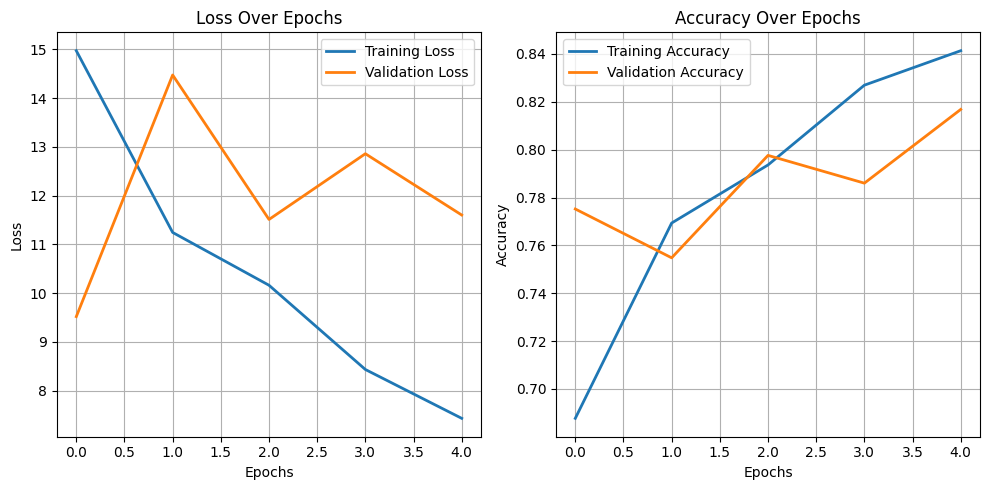

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history_.history)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history_df.index, history_df["loss"], label="Training Loss", linewidth=2)
plt.plot(history_df.index, history_df["val_loss"], label="Validation Loss", linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Over Epochs")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_df.index, history_df["accuracy"], label="Training Accuracy", linewidth=2)
plt.plot(history_df.index, history_df["val_accuracy"], label="Validation Accuracy", linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")
plt.legend()
plt.grid(True)

plt.tight_layout()

In [ ]:
for layer in base_model.layers:
    layer.trainable = True

optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9,
                                 nesterov=True, decay=0.001)
model.compile(loss="categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history_ = model.fit(train_data,
                    batch_size=32,
                    validation_data=test_data,
                    epochs=40)

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 171s 565ms/step - accuracy: 0.1302 - loss: 3.3481 - val_accuracy: 0.1744 - val_loss: 2.2876
Epoch 2/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 115s 491ms/step - accuracy: 0.3277 - loss: 1.9348 - val_accuracy: 0.5668 - val_loss: 1.3905
Epoch 3/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 117s 498ms/step - accuracy: 0.6486 - loss: 1.1398 - val_accuracy: 0.6504 - val_loss: 1.0939
Epoch 4/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 117s 499ms/step - accuracy: 0.7748 - loss: 0.7052 - val_accuracy: 0.7552 - val_loss: 0.7702
Epoch 5/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 127s 542ms/step - accuracy: 0.8730 - loss: 0.4232 - val_accuracy: 0.7560 - val_loss: 0.9622
Epoch 6/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 117s 498ms/step - accuracy: 0.9208 - loss: 0.2676 - val_accuracy: 0.7768 - val_loss: 0.8136
Epoch 7/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 117s 498ms/step - accuracy: 0.9432 - loss: 0.1822 - val_accuracy: 0.7696 - val_loss: 1.0103
Epoch 8/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 127s 542ms/step - accuracy: 0.9432 -

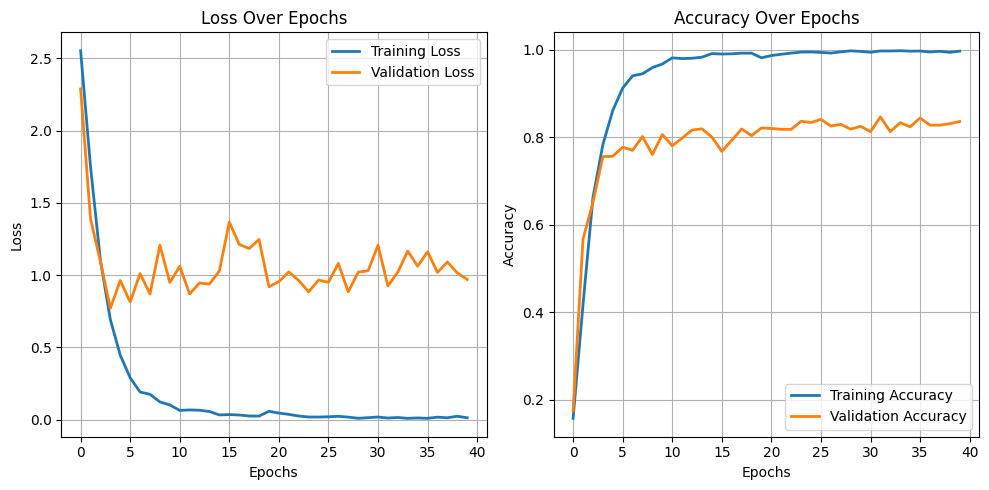

In [79]:
history_df = pd.DataFrame(history_.history)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history_df.index, history_df["loss"], label="Training Loss", linewidth=2)
plt.plot(history_df.index, history_df["val_loss"], label="Validation Loss", linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Over Epochs")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_df.index, history_df["accuracy"], label="Training Accuracy", linewidth=2)
plt.plot(history_df.index, history_df["val_accuracy"], label="Validation Accuracy", linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")
plt.legend()
plt.grid(True)

plt.tight_layout()

In [82]:
model.predict(test_data[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


36

In [87]:
from tensorflow.keras.preprocessing import image

def predict(file_path):
    img = image.load_img(file_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.
    img_array = np.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    predicted_label = class_names[predicted_class]
    return predicted_label

In [97]:
test_pics_path = ['/content/pizza.jpg','/content/fired rice.jpg','/content/grilled salmon.jpg','/content/hamburegr.jpg','/content/ramen.jpg','/content/steak.jpg']

preds = list()
for pic_path in test_pics_path:
    preds.append(predict(pic_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


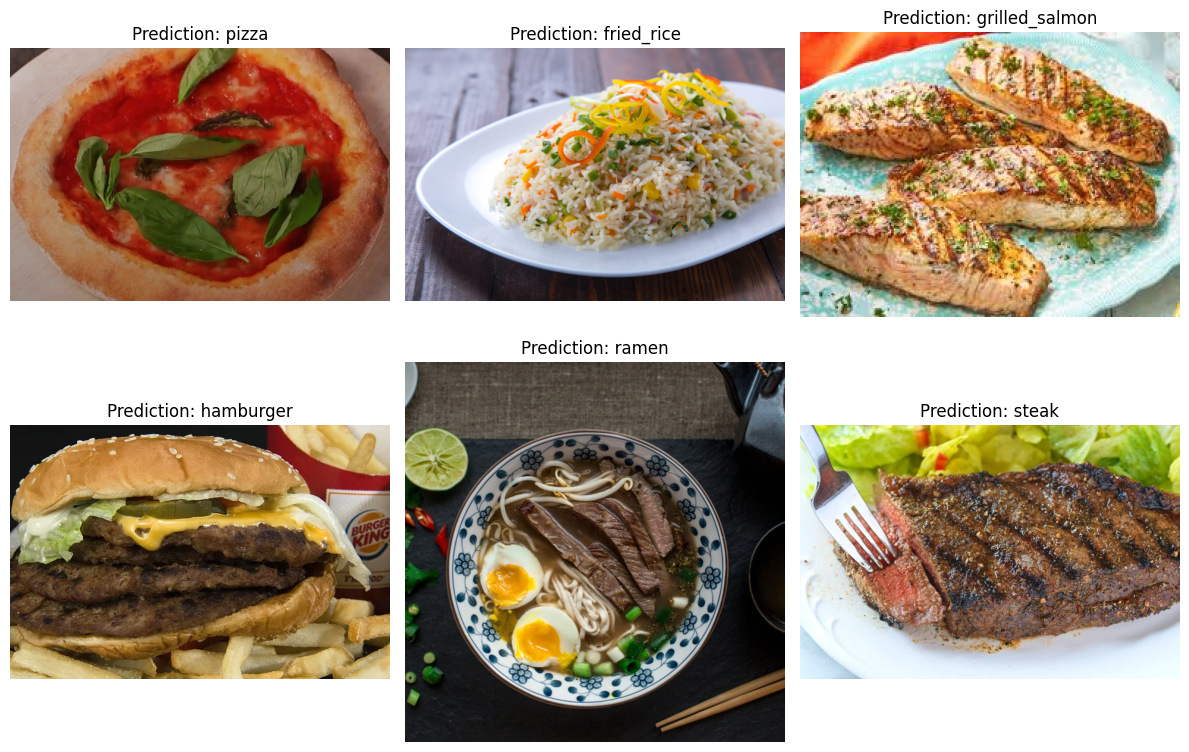

In [98]:
plt.figure(figsize=(12, 8))

for i, pic_path in enumerate(test_pics_path):
    img = mpimg.imread(pic_path)
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {preds[i]}")

plt.tight_layout()
plt.show()
